AUDIO
======

In [1]:
import numpy as np
import scipy.signal as sg
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
%matplotlib inline

import seaborn as sns
from pprint import pprint

from scipy.io import wavfile

sns.set_context("talk")
sns.set_style('white', {'axes.facecolor': 'none'})

In [2]:
def plot(x, y, xlabel='', ylabel=''):
    plt.plot(x,y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    sns.despine()
    ax = plt.gca()
    fig = plt.gcf()
    return ax, fig

float64


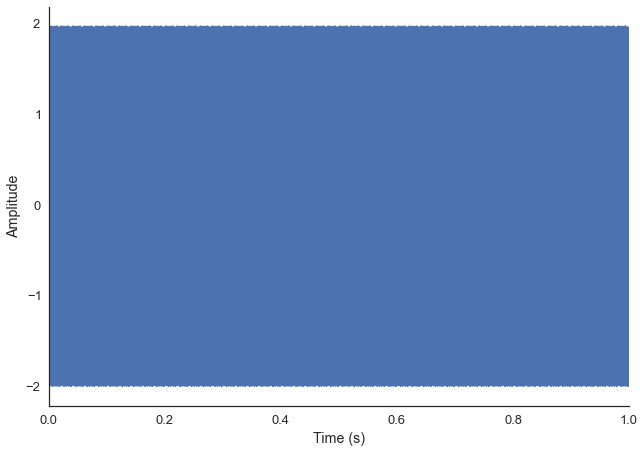

In [22]:
# mpl.rcParams.update(inline_rc)

fs = 44100
step_size = 1./fs
t = np.arange(0.0, 1.0, step_size)
freq0 = 2000
freq1 = 750
twotone = np.sin(t*freq0*2*np.pi) + np.sin(t*freq1*2*np.pi)

ax, fig = plot(t, twotone, 'Time (s)', 'Amplitude')
plt.ylim((-2.2,2.2))

print twotone.dtype
plt.savefig('img/twotone_timeseries.png', transparent=True)
output = np.zeros((len(twotone),2))
output[:,0] = twotone
output[:,1] = twotone
wavfile.write('audio/twotone.wav', fs, output)

(0, 5000)

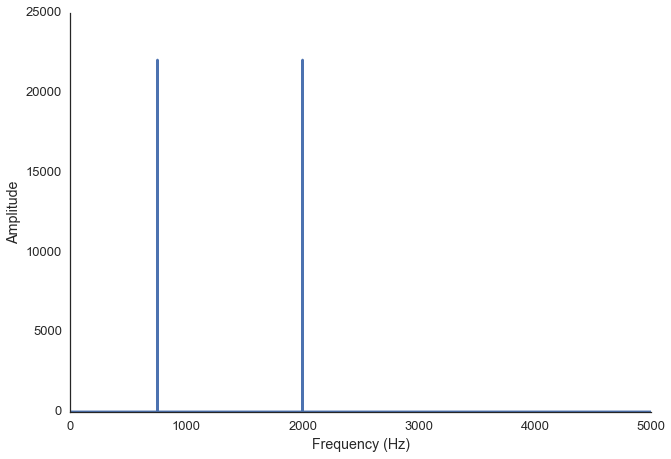

In [4]:
spectrum = np.fft.rfft(twotone)
freqs = np.fft.rfftfreq(len(twotone), 1./fs)
# print spectrum.shape, freqs.shape, freqs[0], freqs[-1]

ax, fig = plot(freqs, abs(spectrum), 'Frequency (Hz)', 'Amplitude')
plt.xlim((0,5000))

# fig.savefig('img/twotone_fft.png', transparent=True)
# fig.savefig('img/twotone_fft_zoom.png', transparent=True)

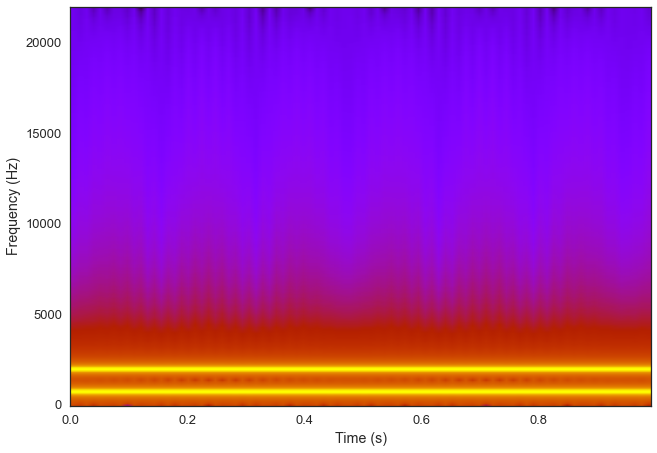

In [5]:
plt.specgram(twotone, Fs=fs, NFFT=512, noverlap=0, cmap='gnuplot');
ax = plt.gca()
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.autoscale(tight=True)

fig = plt.gcf()
fig.savefig('img/twotone_spectrogram.png', transparent=True)

11000 (15103,)


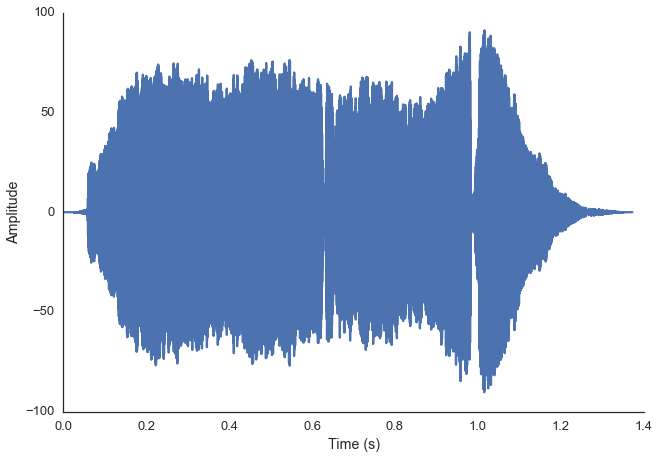

In [6]:
# fs, whistle = wavfile.read('tos-intercom.wav')
fs, whistle = wavfile.read('audio/clean_whistle.wav')
print fs, whistle.shape
t = np.linspace(0,float(len(whistle))/fs, len(whistle))

ax, fig = plot(t, whistle, 'Time (s)', 'Amplitude')

plt.savefig('img/whistle.png')

(7552,) (7552,) 0.0 5499.63583394


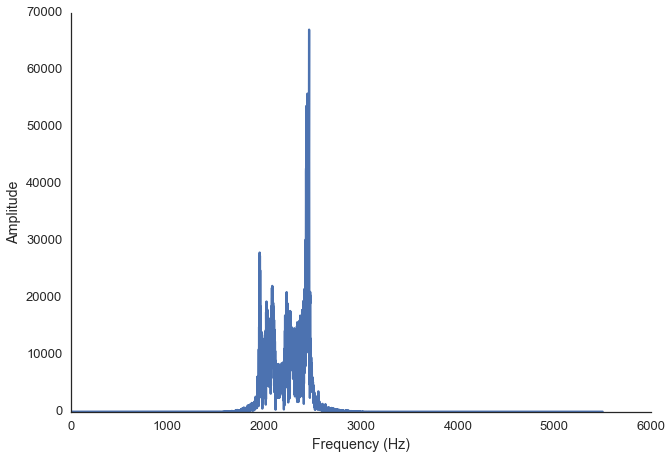

In [7]:
spectrum = np.fft.rfft(whistle)
freqs = np.fft.rfftfreq(len(whistle), 1./fs)
print spectrum.shape, freqs.shape, freqs[0], freqs[-1]
spectrum[0] = 0

ax, fig = plot(freqs, abs(spectrum), 'Frequency (Hz)', 'Amplitude')


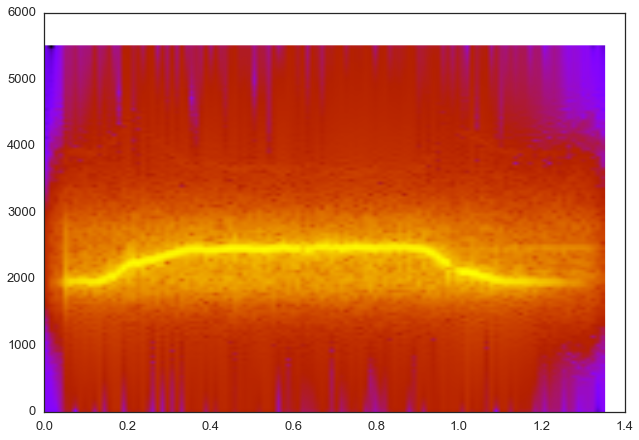

In [8]:
plt.specgram(whistle, Fs=fs, cmap='gnuplot');

Sample rate 44100
(84966,) (84966,) 0.0 22049.8702415


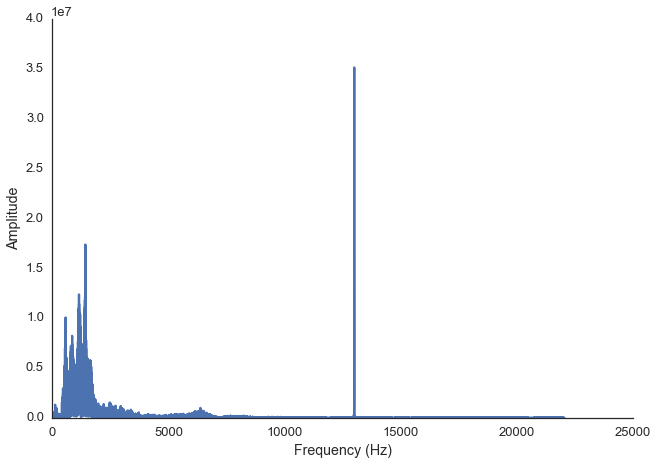

In [9]:
fs, audio = wavfile.read('audio/distorted.wav')
print 'Sample rate', fs

channel = audio[:,0]
spectrum = np.fft.rfft(channel)
freqs = np.fft.rfftfreq(len(channel), 1./fs)
print spectrum.shape, freqs.shape, freqs[0], freqs[-1]
spectrum[0] = 0

ax, fig = plot(freqs, abs(spectrum), 'Frequency (Hz)', 'Amplitude')

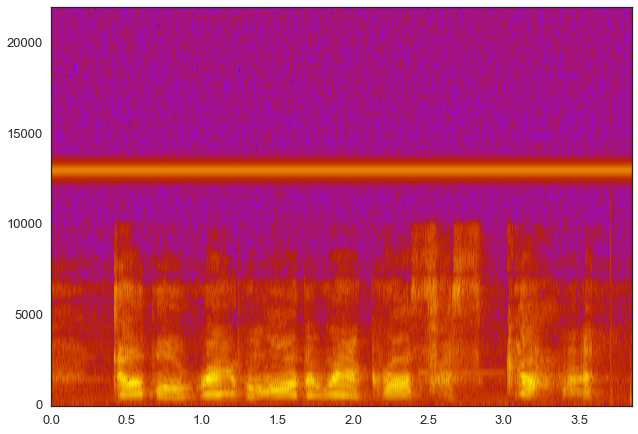

In [10]:
plt.specgram(channel, Fs=fs, cmap='gnuplot');
plt.autoscale(tight=True)
ax = plt.gca()

fig = plt.gcf()
fig.savefig('img/speech_spectrogram.png', transparent=True)

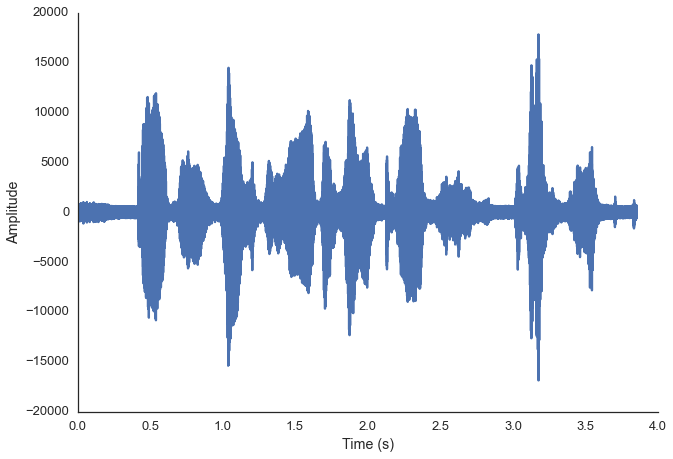

In [16]:

t = np.linspace(0,float(len(audio))/fs, len(audio))
plot(t, audio[:,0], 'Time (s)', 'Amplitude')
fig= plt.gcf()
fig.savefig('img/double_rainbow.png', transparent=True)

Filtering
-----------
[scipy cookbook](http://wiki.scipy.org/Cookbook/FIRFilter)
[scipy signal API](http://docs.scipy.org/doc/scipy/reference/signal.html)

order 33


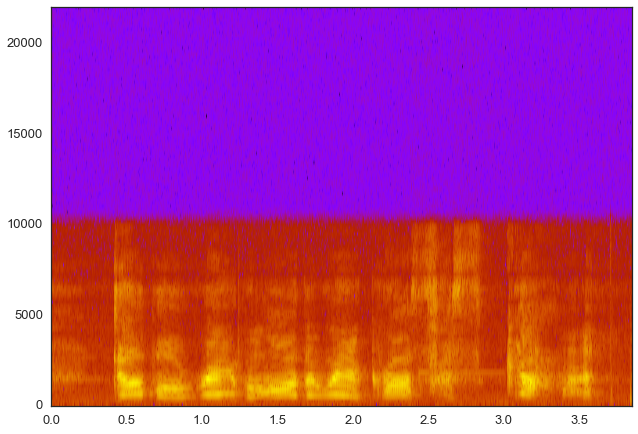

In [11]:
passband = 10000. #Hz
stopband= 11000.
nyq = 0.5 * fs
order, normalized_cutoff = sg.buttord(passband/nyq, stopband/nyq, 3, 40)
print 'order', order
b, a = sg.butter(order, normalized_cutoff, btype='low')

low_passed = np.zeros_like(audio)
low_passed[:,0] = sg.lfilter(b, a, audio[:,0])
low_passed[:,1] = sg.lfilter(b, a, audio[:,1])

plt.specgram(low_passed[:,0], Fs=fs, cmap='gnuplot');
plt.autoscale(tight=True)

wavfile.write('audio/filtered.wav', fs, low_passed)

fig = plt.gcf()
fig.savefig('img/filtered.png', transparent=True)

(<matplotlib.axes._subplots.AxesSubplot at 0x10ee7df10>,
 <matplotlib.figure.Figure at 0x10f4fd190>)

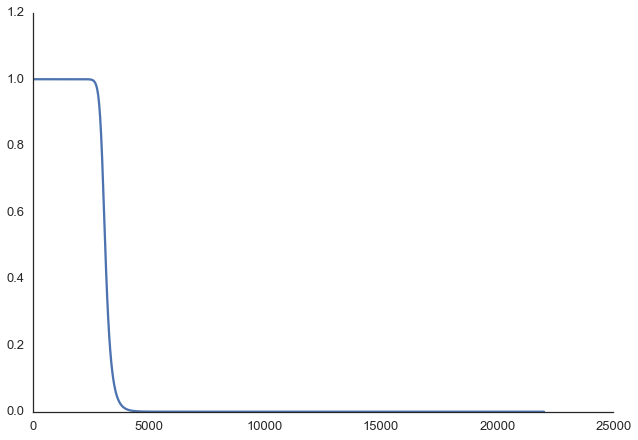

In [23]:
# plot frequency response of filter
w, h = sg.freqz(b, a)

plot((w/np.pi)*nyq, abs(h))
